In [1]:
# 读取数据
import numpy as np
import pandas as pd
data = pd.read_csv('cs-training.csv')
data = data.iloc[:,1:]
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,98,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,96,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
# 数据大小
data.shape

(1000, 11)

In [3]:
# 数据整体预览
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,819.000000,1000.00000,1000.000000,1000.000000,1000.000000,967.000000
mean,0.057000,4.717846,51.793000,0.45900,353.772448,6617.976801,8.52300,0.275000,0.974000,0.250000,0.722854
std,0.231959,98.649119,15.174466,4.39245,1167.736841,8818.220170,5.16877,4.348366,1.019001,4.343543,1.069880
min,0.000000,0.000000,22.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.032362,40.000000,0.00000,0.167349,3300.000000,5.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.159672,52.000000,0.00000,0.360422,5217.000000,8.00000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.533372,62.250000,0.00000,0.750515,8332.500000,11.00000,0.000000,2.000000,0.000000,1.000000
max,1.000000,2340.000000,97.000000,98.00000,15466.000000,208333.000000,31.00000,98.000000,8.000000,98.000000,6.000000


In [4]:
# 数据信息查看
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      1000 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  1000 non-null   float64
 2   age                                   1000 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  1000 non-null   int64  
 4   DebtRatio                             1000 non-null   float64
 5   MonthlyIncome                         819 non-null    float64
 6   NumberOfOpenCreditLinesAndLoans       1000 non-null   int64  
 7   NumberOfTimes90DaysLate               1000 non-null   int64  
 8   NumberRealEstateLoansOrLines          1000 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  1000 non-null   int64  
 10  NumberOfDependents                    967 non-null    float64
dtypes: float64(4), int

In [5]:
# 删除完全重复的记录
data.drop_duplicates(inplace=True)
data.shape

(1000, 11)

# 数据预处理
## 缺失值处理

<Axes: >

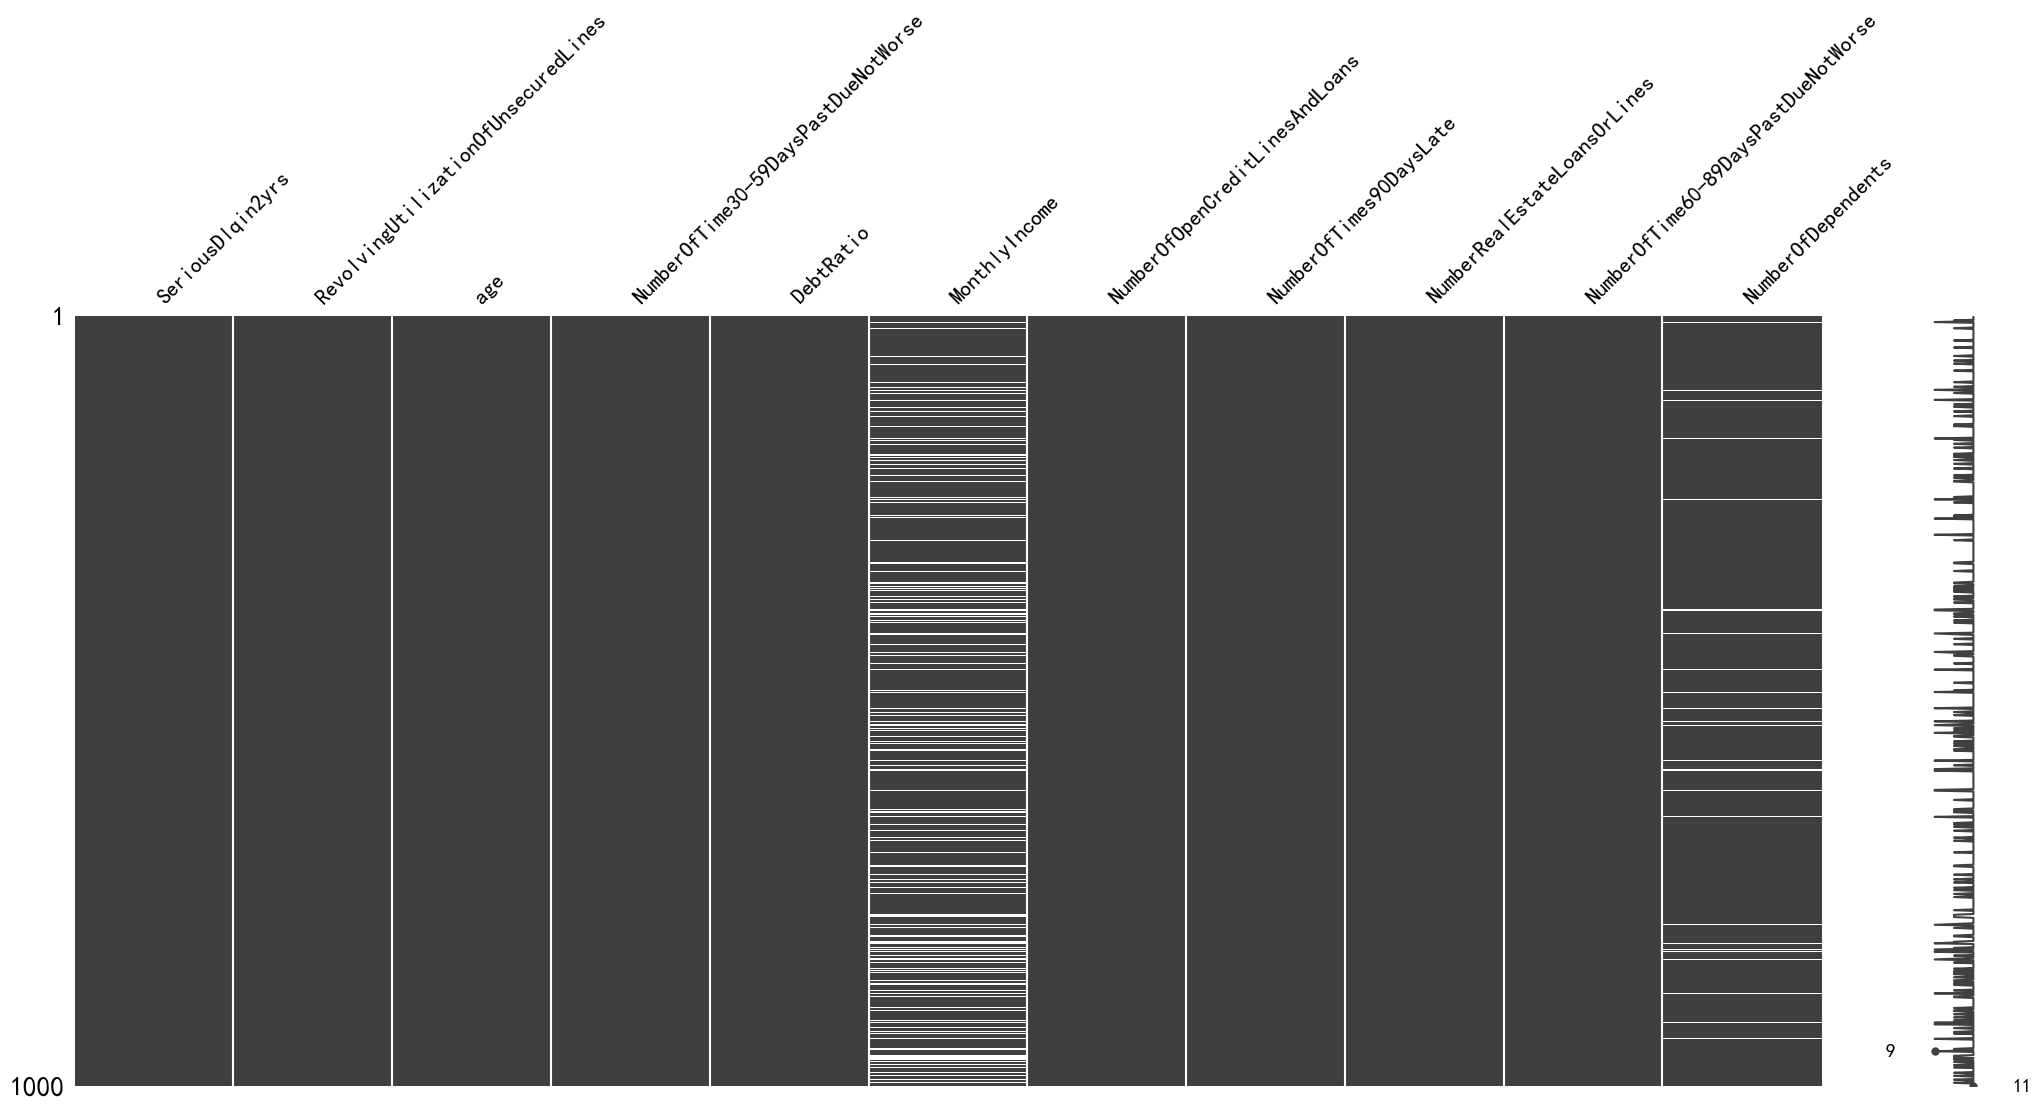

In [7]:
import missingno as msno
msno.matrix(data)

In [8]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing(data, to_fill):
    df = data.copy()
    columns = [*df.columns]
    columns.remove(to_fill)
    
    # 移除有缺失值的列
    columns.remove('NumberOfDependents')
    X = df.loc[:, columns]
    y = df.loc[:, to_fill]
    X_train = X.loc[df[to_fill].notnull()]
    y_train = y.loc[df[to_fill].notnull()]
    X_pred = X.loc[df[to_fill].isnull()]
    rfr = RandomForestRegressor(random_state=22, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_pred).round()
    df.loc[df[to_fill].isnull(), to_fill] = y_pred
    return df

'NumberOfDependents'缺失值较少，可以考虑直接删除

In [9]:
data = fill_missing(data, 'MonthlyIncome')
data.dropna(inplace=True)
data.shape

(967, 11)

## 异常值处理

<Axes: >

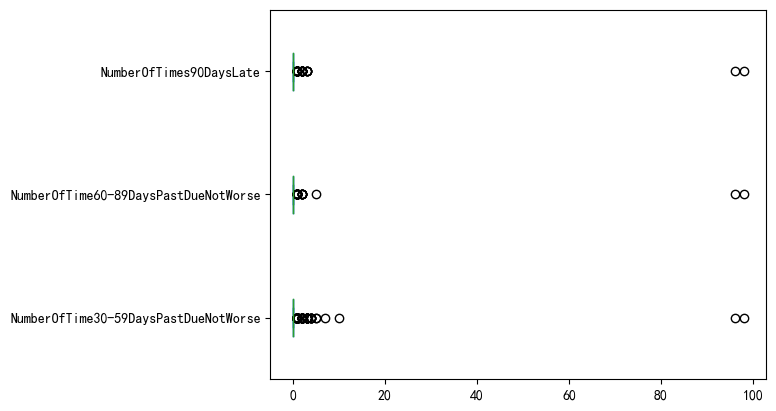

In [10]:
import matplotlib.pyplot as plt
columns = ['NumberOfTime30-59DaysPastDueNotWorse',
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']
data.loc[:, columns].plot.box(vert=False)

从业务上考虑，不应当出现这样的高的次数，这里同样删除掉这些异常数据

In [12]:
for col in columns:
    data = data.loc[data[col] < 90]

观察是否超过90天还款的SeriousDlqin2yrs客户的整体情况，数据集中好客户（不超过还款期）为0，违约客户（超过还款期）为1。统计图如下

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='SeriousDlqin2yrs_cat', ylabel='count'>

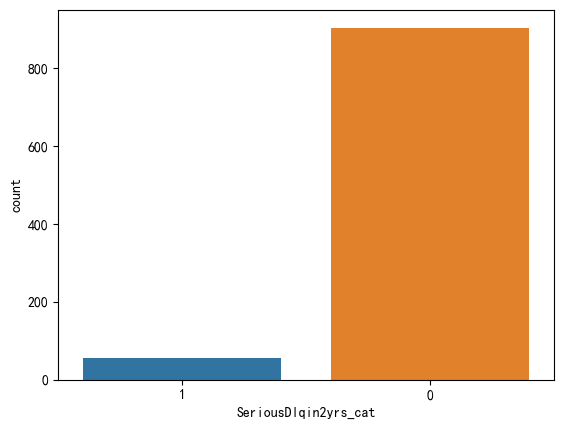

In [14]:
data['SeriousDlqin2yrs_cat'] = data['SeriousDlqin2yrs'].\
map({1:"1",0:"0"})
sns.countplot(x='SeriousDlqin2yrs_cat', data=data)#修改下X轴统计数据列

年龄与违约客户数的变化关系图

In [15]:
g=sns.dist(x=data['age'],y=data['SeriousDlqin2yrs'])

AttributeError: module 'seaborn' has no attribute 'dist'

In [21]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,isDebate
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1
6,0,0.305682,57,0,5710.000000,3829.0,8,0,3,0,0.0,0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,0


In [8]:
#查看各个系数之间的相关性
data.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.080761,-0.069699,0.243402,0.014746,-0.012037,0.071724,0.189531,0.071996,0.264463,0.068145
RevolvingUtilizationOfUnsecuredLines,0.080761,1.000000,-0.002245,-0.014816,-0.013090,0.006746,-0.010990,0.049500,0.023895,-0.007967,0.034545
age,-0.069699,-0.002245,1.000000,-0.047989,0.042565,0.002684,0.130023,-0.063381,-0.012109,-0.021181,-0.187990
NumberOfTime30-59DaysPastDueNotWorse,0.243402,-0.014816,-0.047989,1.000000,-0.012097,0.059579,0.112600,0.234960,0.115424,0.459096,0.074116
DebtRatio,0.014746,-0.013090,0.042565,-0.012097,1.000000,-0.130224,0.045398,-0.037096,0.155563,0.035563,-0.092057
MonthlyIncome,-0.012037,0.006746,0.002684,0.059579,-0.130224,1.000000,0.143548,-0.021504,0.163128,-0.027925,0.137240
NumberOfOpenCreditLinesAndLoans,0.071724,-0.010990,0.130023,0.112600,0.045398,0.143548,1.000000,-0.079855,0.413926,-0.001983,0.119197
NumberOfTimes90DaysLate,0.189531,0.049500,-0.063381,0.234960,-0.037096,-0.021504,-0.079855,1.000000,-0.059537,0.406874,-0.010755
NumberRealEstateLoansOrLines,0.071996,0.023895,-0.012109,0.115424,0.155563,0.163128,0.413926,-0.059537,1.000000,0.029077,0.111911
NumberOfTime60-89DaysPastDueNotWorse,0.264463,-0.007967,-0.021181,0.459096,0.035563,-0.027925,-0.001983,0.406874,0.029077,1.000000,0.020031


In [16]:
Y = data["SeriousDlqin2yrs"]
X = data.iloc[:,[1,3,9]]
Y  # 查看Y
X.head()  # 查看X

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
0,0.766127,2,0
3,0.233810,0,0
4,0.907239,1,0
6,0.305682,0,0
9,0.189169,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)  # 设置random_state=0保证每次相同地方开始划分

In [18]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train, Y_train)  # 使用训练集数据拟合模型

LogisticRegression()

In [19]:
lrmodel.coef_  # 查看各变量系数

array([[1.36663492e-03, 3.19610116e-01, 1.56337956e+00]])

In [20]:
lrmodel.intercept_  # 查看截距项系数

array([-3.13866892])

In [21]:
Y_predict = lrmodel.predict(X_test)  # 进行预测
Y_predict[0:20]  # 查看前20个预测值

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
# 生成报告，查看模型效果
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       273
           1       0.00      0.00      0.00        16

    accuracy                           0.94       289
   macro avg       0.47      0.50      0.48       289
weighted avg       0.89      0.94      0.91       289



In [23]:
#给模型打分
score=lrmodel.score(X_test,Y_test)
print(score)

0.9377162629757786


In [24]:
# 查看ROC/AUC
from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(Y_test, Y_predict))
print(roc_auc_score(Y_test, Y_predict))

0.9377162629757786
0.49633699633699635
